# Individual Assignment - Submission

> - **Course:** *CE/CZ 4042 - Neural Networks and Deep Learning* 
> - **Name:** *Singh Aishwarya*
> - **Matriculation Number:** *U1923952C*
> - **Part:** *A - Classification Problem*
> - **Question:** *5*

### Necessary Imports

In [ ]:
# Basic Helper Libraries
import tensorflow
import pandas as pd
import time
import numpy as np

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Libraries for plotting and visualization
import pylab as plt
import matplotlib.pyplot as matplt

### Data Retrieval + Train-Test Split

In [ ]:
# Accessing the features data in the csv file and assigning it to a dataframe
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Check the value count of the output
df['label'].value_counts()

classical    100
reggae       100
blues        100
pop          100
disco        100
hiphop       100
jazz         100
metal        100
country      100
rock         100
Name: label, dtype: int64

In [ ]:
# Prepare Train and Test Dataframes
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # Divide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    # Scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [ ]:
# Splitting the prepared dataframes (70% Training and 30% Test)
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


### Model Training - Answering the question

> **Question:** *We are going to dissect the purpose of dropout in the model.*

In [ ]:
# Setting the given parameters for the model
num_epochs = 50
num_hidden = 16
batch_size = 1
num_labels = 10
num_features = 57

#### a) Why do we add dropouts? Investigate the purpose of dropouts by removing dropouts from your original 2-layer network (before changing the batch size and number of neurons). Plot accuracies on training and test data with neural network without dropout. Plot as well the losses on training and test data with neural network without dropout.

In [ ]:
# Designing the model with the given parameters
model = Sequential()
model.add(Dense(num_hidden, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

# Setting the loss to sparse_categorical_crossentropy as this is a classification problem
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training the model
history = model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test))

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.0091 - accuracy: 0.2729 - val_loss: 1.7186 - val_accuracy: 0.4200
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 1.4017 - accuracy: 0.4986 - val_loss: 1.4244 - val_accuracy: 0.4867
Epoch 3/50
700/700 [==============================] - 1s 824us/step - loss: 1.1641 - accuracy: 0.6057 - val_loss: 1.2718 - val_accuracy: 0.5433
Epoch 4/50
700/700 [==============================] - 1s 815us/step - loss: 1.0108 - accuracy: 0.6614 - val_loss: 1.1794 - val_accuracy: 0.5933
Epoch 5/50
700/700 [==============================] - 1s 823us/step - loss: 0.9150 - accuracy: 0.6971 - val_loss: 1.1117 - val_accuracy: 0.6167
Epoch 6/50
700/700 [==============================] - 1s 821us/step - loss: 0.8381 - accuracy: 0.7229 - val_loss: 1.0548 - val_accuracy: 0.6333
Epoch 7/50
700/700 [==============================] - 1s 828us/step - loss: 0.7707 - accuracy: 0.7529 - val_loss: 1.0347 - val_accuracy: 0.6

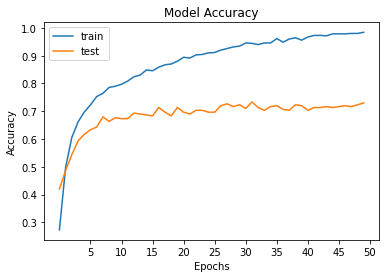

In [ ]:
# Plot the train and test accuracies without dropout
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.savefig('./Figures/PartAQuestion5-1.png')

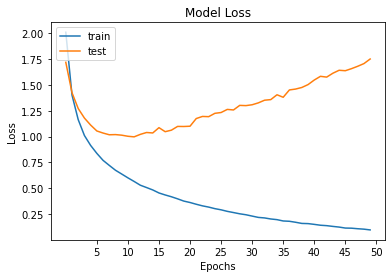

In [ ]:
# Plot the train and test losses without dropout
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.savefig('./Figures/PartAQuestion5-2.png')

> **Why do we add dropouts?** *Dropout is a strategy for preventing overfitting in neural networks by removing units at random during training. As a consequence, the trained model functions as an ensemble model composed of several neural networks. The forecast of such ensembled networks is averaged in each layer at test time to produce the final model prediction. Because certain portions of the network turn off during training, we may model Dropout as training several neural networks and averaging their predictions during testing.*

#### b) Explain the effect of removing dropouts.

> *As it can be seen in both the accuracy and loss plots of the model without dropouts, the rapid increase in loss for the test curve, as well as the large, significant gap between the train and test accuracy plots indicate extreme overfitting performed by the model. The dropout has enabled the model to overfit, that too by a huge margin.*

#### c) What is another approach that you could take to address overfitting in the model?

> **Early Stopping:** *When training a model with an iterative approach, early stopping is a type of regularization. With each repetition, this technique improves the model's fit to the training data. This increases the model's performance on data from the test set to a point. However, after that time, enhancing the model's fit to the training data results in higher generalization error. Early stopping criteria specify how many iterations may be performed before the model begins to overfit.*

### **Conclusions for Part A:**

#### What are some limitations of the current approach (using FFNs to model such engineered features)?
> *The disadvantage of the current approach is that the use of FFNs to model our engineered features can lead to risk of overfitting - as we see through the course of the questions in Part A. You run the danger of over-fitting the data if you try to build a neural network to model more basic features. This simply indicates that the model's capacity to generalize to new cases is lost. In addition to this, having larger number of features and parameters can increase the computational time - greater time to converge. Furthermore, having multiple parameters also implies difficulty in understanding the functionality of the neural network itself - need to perform repetitive experiments to observe a change in the performance of the model - as done in Part A through the course of questions.*

#### Out of the parameters that were tuned, which was most impactful in terms of improving the model performance and what could be some reasons for that? 
> *Use of dropouts and batch size - there was a significant drop in model performance without dropuouts, and a significant impact on model performance and computation time without optimum batch size.*

#### Considering that audio tracks are originally waveforms, what are some alternative approaches to achieve the goal of genre classification? What kind of neural network architectures will be used instead?
> *An alternative approach can be to convert the waveforms to spectograms to extract different features from them, in addition to metadata for those audio files. An example of a neural network architecture for this classification task that can be deployed can be CNNs - Convolutional Neural Networks - because it can learn patterns that are translation invariant and have spatial hierarchies.*

#### What other datasets and tasks can this approach of modelling waveform data be used for? What changes to the pipeline, if any, will you have to make when approaching these problems?
> *This approach can also be used for NLP - Natural Language Processing - use speech data or audio and classify into different languages or for speech recognition tasks. A change to the pipeline would be to do more exploratory analysis on features - to have a better understanding of data with a lot of predictor variables. In addition to this, perform feature importance to gauge which features improve the model performance.*
